In [1]:
import pandas as pd
import pickle
import string
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rtree

In [2]:
with open('current_all_tweets_locations_final.pickle', "rb") as f:
    tweets = pickle.load(f)

In [3]:
#Create a dataframe of users per province
users = tweets.drop_duplicates(['user_id'])
provinces = users.copy()
provinces["provinces_count"] = 1
provinces = provinces[["province", "provinces_count"]]
provinces = provinces.groupby(["province"]).sum()

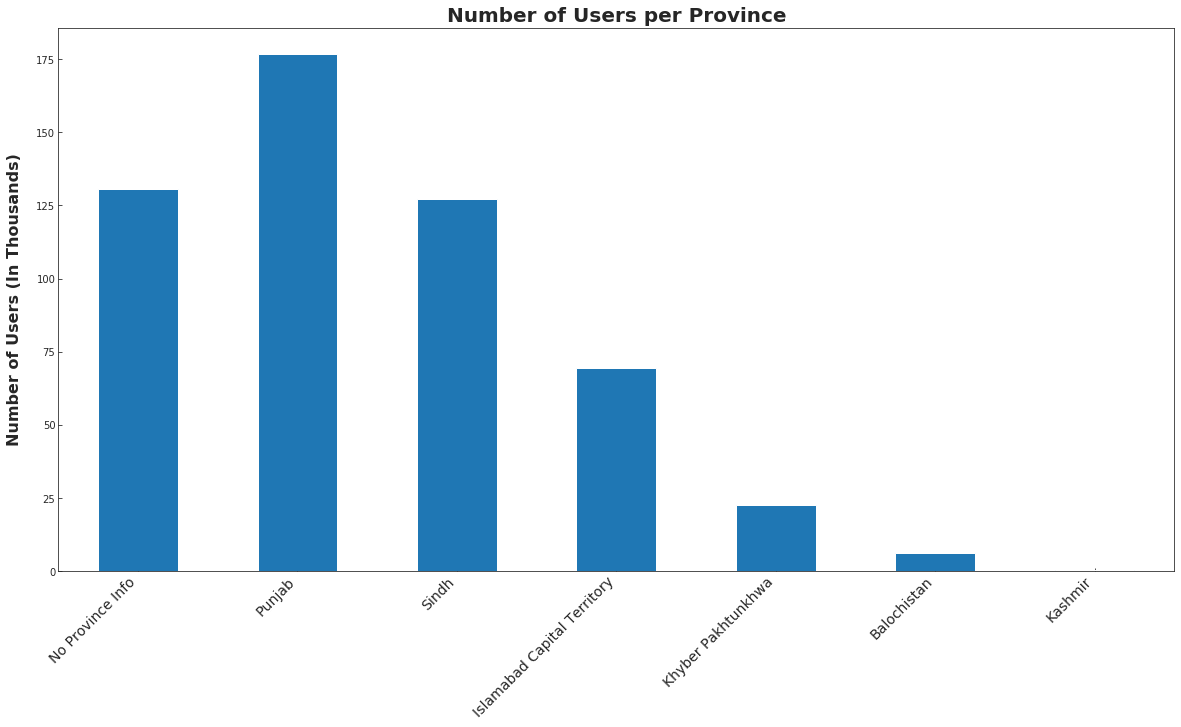

In [17]:
#Plot number of users in each province
provinces = provinces.sort_values(by='provinces_count', ascending=False)

plot["provinces_count"] = plot["provinces_count"] / 1000

province_list = ["No Province Info", "Punjab", "Sindh", "Islamabad Capital Territory", "Khyber Pakhtunkhwa", "Balochistan", "Kashmir"]

with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=plot
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Number of Users (In Thousands)',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='both',direction='in',pad=3)
    ax.set_xticklabels(province_list, rotation = 45, ha = "right", fontsize = 14)
    ax.set_title("Number of Users per Province", fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("Number of Users per Province.pdf", dpi=300, bbox_inches ="tight")

In [65]:
#Create dataframes of users in each punjab
punjab = users[users["province"] == "punjab"]
punjab["punjab_count"] = 1
punjab = punjab[["user_location", "punjab_count"]]
punjab = punjab.groupby(["user_location"]).sum()
punjab = punjab.sort_values(by='punjab_count', ascending=False)

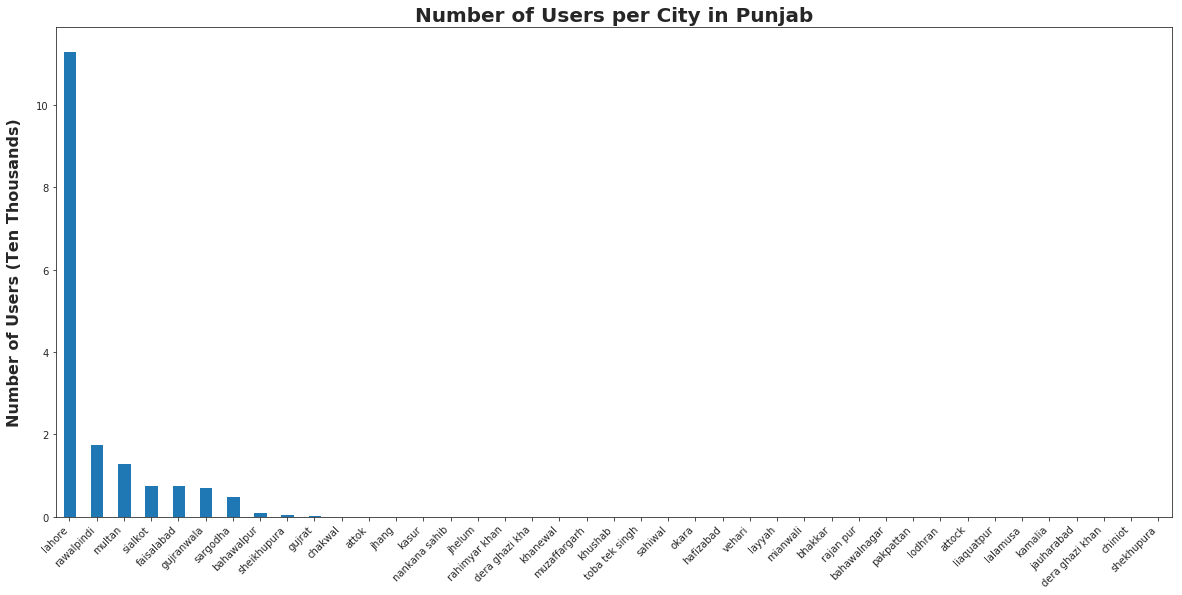

In [112]:
#Plot users by city in punjab
punjab["punjab_count"] = punjab["punjab_count"] / 10000

with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=punjab
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Number of Users (Ten Thousands)',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=14, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Number of Users per City in Punjab", fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("new_figs/Number of Users Punjab.pdf", dpi=300, bbox_inches ="tight", transparent = True)

In [103]:
#Create dataframe with users in sindh
sindh = users[users["province"] == "sindh"]
sindh["sindh_count"] = 1
sindh = sindh[["user_location", "sindh_count"]]
sindh = sindh.groupby(["user_location"]).sum()
sindh = sindh.sort_values(by='sindh_count', ascending=False)

/home/dval/.conda/envs/symbolic/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


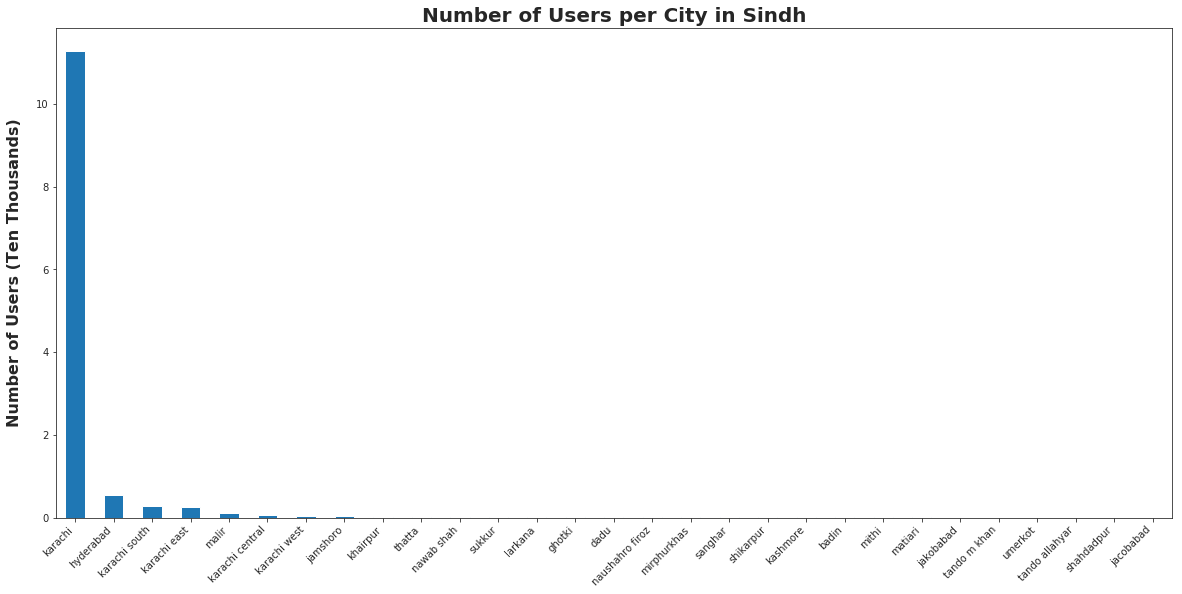

In [113]:
#Plot users by city in Sindh
sindh["sindh_count"] = sindh["sindh_count"] / 10000

with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=sindh
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Number of Users (Ten Thousands)',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=14, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Number of Users per City in Sindh", fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("new_figs/Number of Users Sindh.pdf", dpi=300, bbox_inches ="tight", transparent = True)

In [6]:
#Create dataframe of cities with more than 25 users in KP
kp = users[users["province"] == "khyber pakhtunkhwa"]
kp["kp_count"] = 1
kp = kp[["user_location", "kp_count"]]
kp = kp.groupby(["user_location"]).sum()
kp = kp.sort_values(by='kp_count', ascending=False)
kp = kp[kp["kp_count"]>25]

/home/dval/.conda/envs/symbolic/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


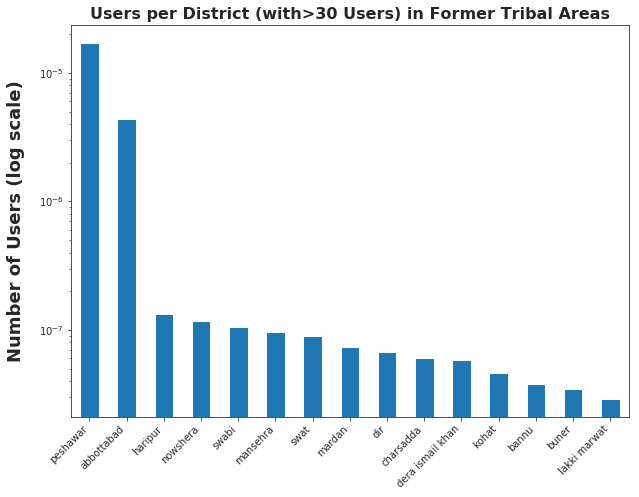

In [9]:
#Plot users per city in KP
kp["kp_count"] = kp["kp_count"] / 1000
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(10,8))
    data_to_plot=kp
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Number of Users (log scale)',fontweight='bold', labelpad = 14, fontsize = 18)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 18)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=18, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Users per District (with>30 Users) in Former Tribal Areas", fontweight="bold", fontsize=16)
    ax.get_legend().remove()
    ax.set_yscale('log')
    
plt.savefig("Number of Users KP.pdf", dpi=300, bbox_inches ="tight", transparent = True)

In [116]:
#Create dataframe of users per city in balochistan
balochistan = users[users["province"] == "balochistan"]
balochistan["balochistan_count"] = 1
balochistan = balochistan[["user_location", "balochistan_count"]]
balochistan = balochistan.groupby(["user_location"]).sum()
balochistan = balochistan.sort_values(by='balochistan_count', ascending=False)

/home/dval/.conda/envs/symbolic/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


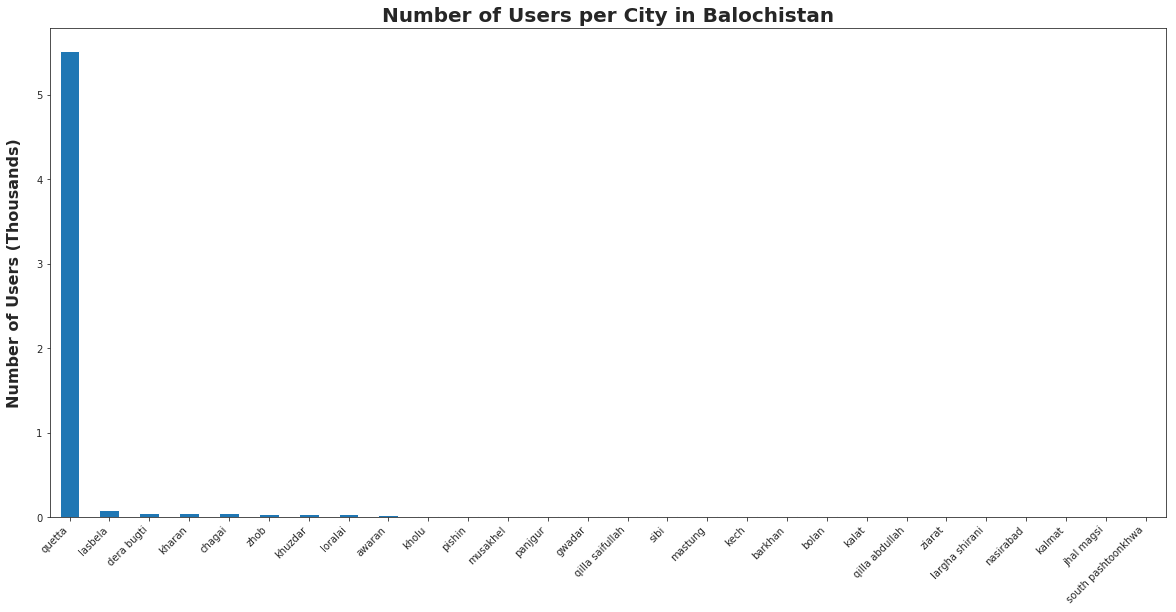

In [121]:
#plot users per city in balochistan
balochistan["balochistan_count"] = balochistan["balochistan_count"] / 1000

with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=balochistan
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Number of Users (Thousands)',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=14, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Number of Users per City in Balochistan", fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("new_figs/Number of Users Balochistan.pdf", dpi=300, bbox_inches ="tight", transparent = True)

In [122]:
#Create dataframe of users per city in. Kashmir
kashmir = users[users["province"] == "kashmir"]
kashmir["kashmir_count"] = 1
kashmir = kashmir[["user_location", "kashmir_count"]]
kashmir = kashmir.groupby(["user_location"]).sum()
kashmir = kashmir.sort_values(by='kashmir_count', ascending=False)

/home/dval/.conda/envs/symbolic/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


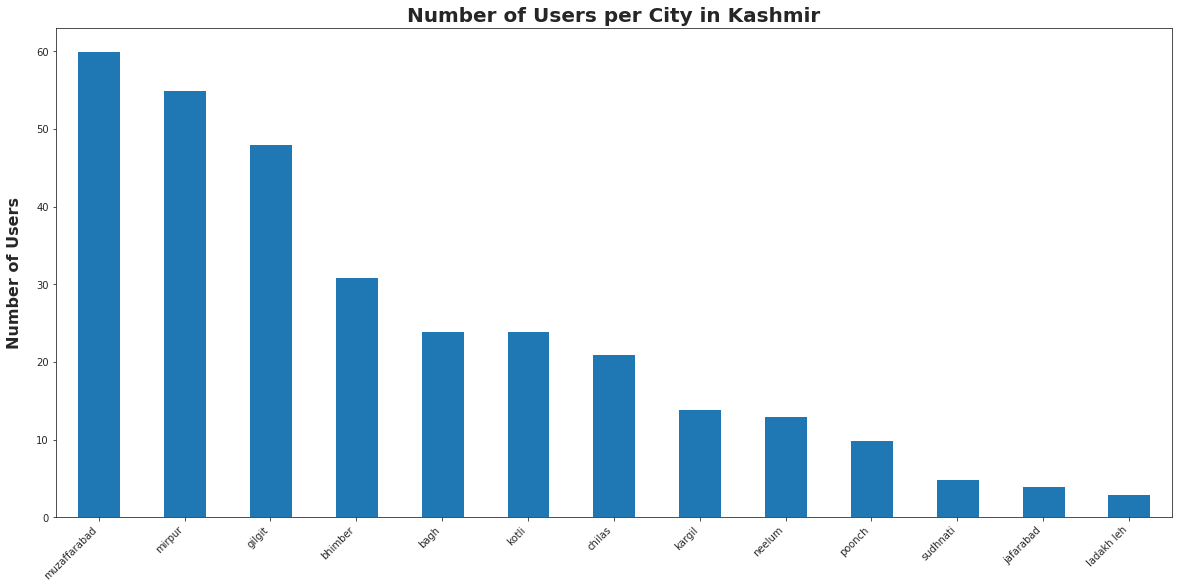

In [124]:
#Plot users per city in Kashmir
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=kashmir
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Number of Users',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=14, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Number of Users per City in Kashmir", fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("new_figs/Number of Users Kashmir.pdf", dpi=300, bbox_inches ="tight", transparent = True)

In [125]:
#Import pakistan shapefile and merge fields of interest with user location data
locations = gpd.read_file('PAK_adm3.shp')
locations = locations[["NAME_3", "geometry"]]
locations["NAME_3"] = locations["NAME_3"].str.lower()
users = users[["user_location"]]
users["users_count"] = 1
users = users.groupby(["user_location"]).sum()
plot = locations.merge(users, how='left', left_on="NAME_3", right_on="user_location")

/home/dval/.conda/envs/symbolic/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


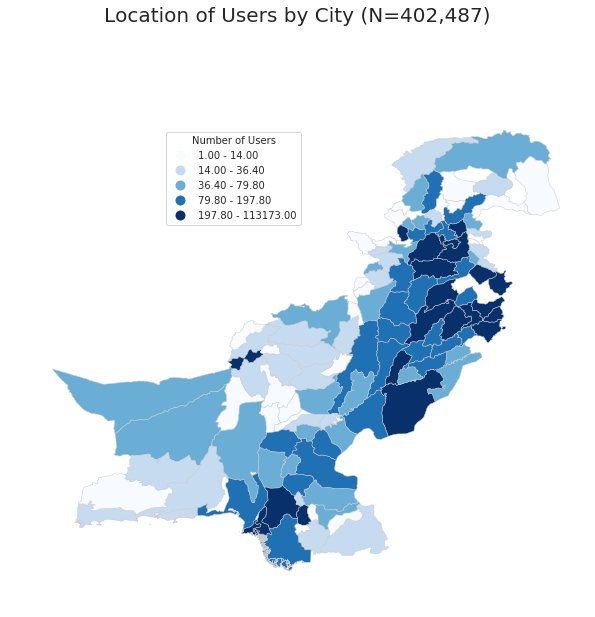

In [145]:
#Plot cloropleth map of user locations
with sns.axes_style("white"):
    sns.set_style("ticks")
    
    fig,ax = plt.subplots(figsize=(10,10))

    data_to_plot=plot[['users_count','geometry']].copy()

    fig.suptitle('Location of Users by City (N=402,487)', fontsize = 20)
    
    data_to_plot.plot(
    'users_count',
    scheme='Quantiles',
    linewidth=0.5, 
    k=5,
    ax=ax, 
    cmap='Blues',
    edgecolor='0.8',
    legend=True,
    legend_kwds={
    'frameon': True, 
    'title': 'Number of Users',
    'loc': 'lower right',
    'bbox_to_anchor':(0.5, 0.75), 
    'frameon':'False',
    })
    ax.axis('off')
    
    plt.savefig("new_figs/Map of Users by City.pdf", dpi=300, bbox_inches ="tight", transparent = True)
